In [1]:
import sys
!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser
!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'https://www.bigkinds.or.kr/v2/news/index.do'
driver.get(url)

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

# 크롬 드라이버 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # 브라우저를 띄우지 않음
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service=webdriver_service, options=options)

# URL 접속
url = 'https://www.bigkinds.or.kr/v2/news/index.do'
driver.get(url)

# 잠시 대기 (페이지 로드 완료 대기)
time.sleep(3)

# 기간 클릭
driver.find_element(By.CSS_SELECTOR, '#collapse-step-1-body > div.srch-detail.v2 > div > div.tab-btn-wp1 > div.tab-btn-inner.tab1 > a').click()
time.sleep(1)

# 1년 선택
driver.find_element(By.CSS_SELECTOR, '#srch-tab1 > div > div.radio-btn-wp.col6 > span:nth-child(6) > label').click()
time.sleep(1)

# 기본 검색어 입력 (박보영)
search_input = driver.find_element(By.CSS_SELECTOR, '#total-search-key')  # 기본 검색어 입력 필드
search_input.click()
search_input.send_keys('"박보영"')  # '박보영'을 따옴표와 함께 입력
time.sleep(1)

# 엔터로 검색
search_input.send_keys(Keys.RETURN)
time.sleep(3)

# 50개씩 보기 옵션 클릭
driver.find_element(By.CSS_SELECTOR, '#select2 > option:nth-child(3)').click()  # 50개씩 보기 선택
time.sleep(2)

# 결과 저장할 리스트 초기화
title = []
name = []
date = []

# 기사 50개 가져오기
for i in range(1, 51):
    try:
        # 기사 제목, 기자 이름, 작성일 추출
        article_title = driver.find_element(By.CSS_SELECTOR, f'#news-results > div:nth-child({i}) > div > div.cont > a > div > strong > span').text
        reporter_name = driver.find_element(By.CSS_SELECTOR, f'#news-results > div:nth-child({i}) > div > div.cont > div > p:nth-child(3)').text
        article_date = driver.find_element(By.CSS_SELECTOR, f'#news-results > div:nth-child({i}) > div > div.cont > div > p:nth-child(2)').text

        title.append(article_title)
        name.append(reporter_name)
        date.append(article_date)
    except Exception as e:
        print(f"Error while extracting article {i}: {e}")

# 데이터프레임 생성
columns = ['title', 'name', 'date']
df = pd.DataFrame({
    columns[0]: title,
    columns[1]: name,
    columns[2]: date
}, columns=columns)

# 데이터프레임 출력
print(df.head())



                                               title    name        date
0         김혜수 1위, 3월 영화배우 브랜드평판 정상 차지..2위 손석구·3위 이병헌  박동제 기자  2025/03/18
1             어릴 적 아빠를 잃은 딸은 왜 '애증의 아빠'와 닮은 이에게 끌렸을까          2025/03/18
2  이병헌, 사비 털어 워크숍 마련했지만 이제는 그만!!!...男 술, 女 마사지에 지...  최승섭 기자  2025/03/17
3              홍주찬, 창작 초연 뮤지컬 '너의 결혼식' 주인공 황우연 役 캐스팅     최규춘  2025/03/17
4                   홍주찬, 뮤지컬 '너의 결혼식' 캐스팅→스페셜 포스터 공개     한아진  2025/03/17


In [23]:
df.to_csv('final_top50_news.csv', index=False)

In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,972 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126562 files and dire

In [27]:
import csv
#CSV 파일 읽어오기
f = open('/content/final_top50_news.csv', 'r')
rdr = csv.reader(f)

title = ''
for line in rdr:
  title = title + ' ' + line[1]
print(title)
f.close()

 name 박동제 기자  최승섭 기자 최규춘 한아진 전자신문인터넷 이금준 기자 최정아 기자 정진우|기자| 임혜선 전미옥 함상범 기자 원성윤 기자(socool@sportsseoul.com) 신영은 스타투데이 기자(shinye@mk.co.kr) 박동제 기자 김현희 기자 김원철 기자 데일리안 유진상 기자 (yjs@dailian.co.kr)  우승오 정가영 기자 신영선 기자 최정아 기자 CBS노컷뉴스 정재림 기자 정재림 신준섭 지동현 기자 최영수 기자 이성원 정석우 기자 신진아 기자 (jashin@fnnews.com) 안진용 지동현 기자 지동현 기자 안진용 김현희 기자 최정아 기자 뉴스24 윤수경 기자 CBS노컷뉴스 정재림 기자 정재림 정시행 기자 송혜진 기자 심언경 박동제 기자 CBS노컷뉴스 정재림 기자 정재림 문상혁.권유진(moon.sanghyeok@joongang.co.kr) 조선일보 우다빈 최정아 기자 신영은 스타투데이 기자(shinye@mk.co.kr) 박동제 기자 CBS노컷뉴스 정재림 기자 정재림


In [28]:
title = title[6:]
print(title)


박동제 기자  최승섭 기자 최규춘 한아진 전자신문인터넷 이금준 기자 최정아 기자 정진우|기자| 임혜선 전미옥 함상범 기자 원성윤 기자(socool@sportsseoul.com) 신영은 스타투데이 기자(shinye@mk.co.kr) 박동제 기자 김현희 기자 김원철 기자 데일리안 유진상 기자 (yjs@dailian.co.kr)  우승오 정가영 기자 신영선 기자 최정아 기자 CBS노컷뉴스 정재림 기자 정재림 신준섭 지동현 기자 최영수 기자 이성원 정석우 기자 신진아 기자 (jashin@fnnews.com) 안진용 지동현 기자 지동현 기자 안진용 김현희 기자 최정아 기자 뉴스24 윤수경 기자 CBS노컷뉴스 정재림 기자 정재림 정시행 기자 송혜진 기자 심언경 박동제 기자 CBS노컷뉴스 정재림 기자 정재림 문상혁.권유진(moon.sanghyeok@joongang.co.kr) 조선일보 우다빈 최정아 기자 신영은 스타투데이 기자(shinye@mk.co.kr) 박동제 기자 CBS노컷뉴스 정재림 기자 정재림


In [29]:
!pip install konlpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 25.8 MB/s eta 0:00:00


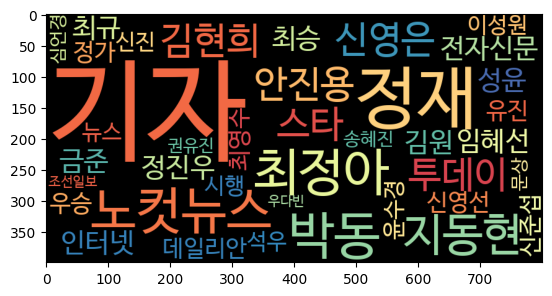

In [30]:
#문자열 분석하기
okt = Okt()
nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
#워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',\
scale=2.0, colormap='Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [32]:
import pandas as pd
df = pd.read_csv('/content/행정구역_시군구_별__성별_인구수_20250320155653.csv', encoding = 'cp949')

columns = list(df.columns)
del columns[1]
popDiff = [ ]

for i in range(2, len(df)):
  row = [df.loc[i][0]]
  for j in range(2, len(df.loc[i])):
    pop = int(df.loc[i][j]) - int(df.loc[i][j - 1])
    row.append(pop)
  popDiff.append(row)

dfPopDiff = pd.DataFrame(popDiff, columns=columns)
dfPopDiff.to_csv('populationDiff.csv', encoding='cp949')

<ipython-input-32-ea92529048e6>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row = [df.loc[i][0]]
<ipython-input-32-ea92529048e6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop = int(df.loc[i][j]) - int(df.loc[i][j - 1])


In [34]:
columns = list(df.columns)
del columns[1]
popIncreaseRate = [ ]
for i in range(2, len(df)):
  row = [df.loc[i][0]]
  for j in range(2 , len(df.loc[i])):
    pop = float((int(df.loc[i][j])-int(df.loc[i][j-1]))/int(df.loc[i][j-1])) * 100.0
    row.append(pop)
  popIncreaseRate.append(row)
dfPopIncreaseRate = pd.DataFrame(popIncreaseRate, columns=columns)
dfPopIncreaseRate.to_csv('populationIncreaseRate.csv', encoding='cp949', index=False)

<ipython-input-34-822732c42582>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row = [df.loc[i][0]]
<ipython-input-34-822732c42582>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop = float((int(df.loc[i][j])-int(df.loc[i][j-1]))/int(df.loc[i][j-1])) * 100.0


In [37]:
import pandas as pd
df = pd.read_csv('/content/populationDiff.csv', encoding='cp949')
popDiff = [ ]
for i in range(0, len(df)):
  popDiff.append(list(df.loc[i]))

In [41]:
#x축에 표시할 값
x_values = [ ]
for i in range(1, 7):
  yyyymm = '20220' + str(i)
  x_values.append(yyyymm)
#월 증감 인구수를 지역별 변수 y에 대입하기
y_seoul = popDiff[0][84:90]
y_bs = popDiff[1][84:90]
y_dg = popDiff[2][84:90]
y_ic = popDiff[3][84:90]
y_gj = popDiff[4][84:90]
y_dj = popDiff[5][84:90]
y_us = popDiff[6][84:90]
y_sj = popDiff[7][84:90]
y_gg = popDiff[8][84:90]
y_gw = popDiff[9][84:90]
y_cb = popDiff[10][84:90]
y_cn = popDiff[11][84:90]
y_jb = popDiff[12][84:90]
y_jn = popDiff[13][84:90]
y_gb = popDiff[14][84:90]
y_gn = popDiff[15][84:90]
y_jj = popDiff[16][84:90]

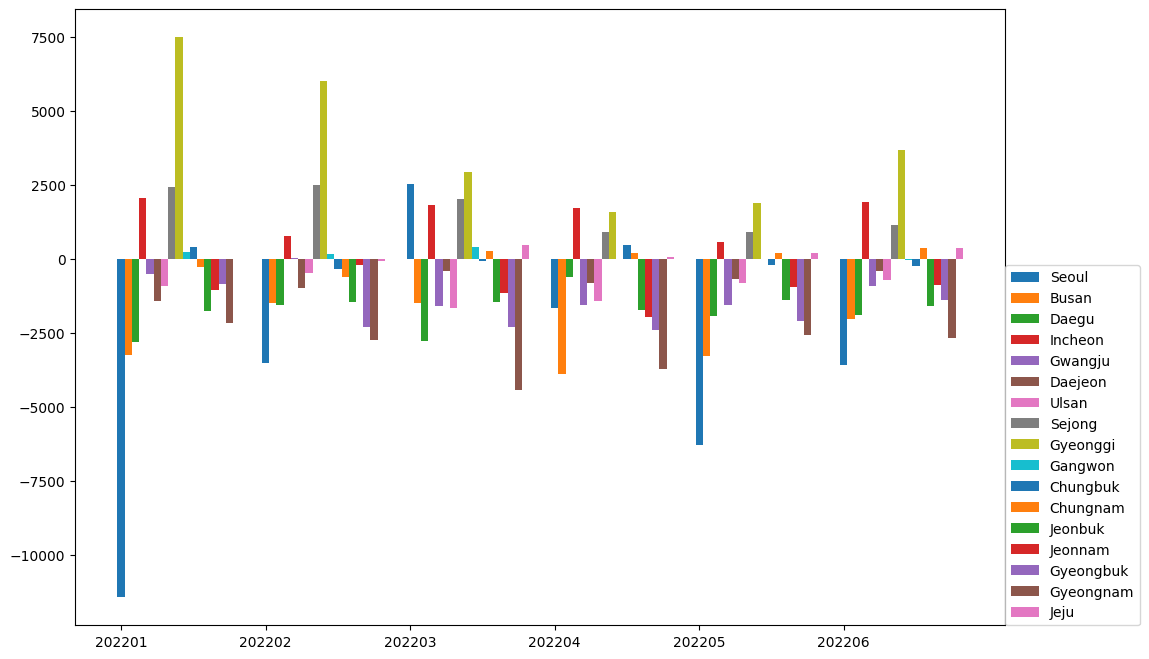

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,8))
ax = plt.subplot( )
bar_width = 0.05

x = np.arange(6)
ax.set_xticks(x)
ax.set_xticklabels(x_values)

p1 = plt.bar(x, y_seoul, bar_width)
p2 = plt.bar(x + bar_width, y_bs, bar_width)
p3 = plt.bar(x + bar_width*2, y_dg, bar_width)
p4 = plt.bar(x + bar_width*3, y_ic, bar_width)
p5 = plt.bar(x + bar_width*4, y_gj, bar_width)
p6 = plt.bar(x + bar_width*5, y_dj, bar_width)
p7 = plt.bar(x + bar_width*6, y_us, bar_width)
p8 = plt.bar(x + bar_width*7, y_sj, bar_width)
p9 = plt.bar(x + bar_width*8, y_gg, bar_width)
p10 = plt.bar(x + bar_width*9, y_gw, bar_width)
p11 = plt.bar(x + bar_width*10, y_cb, bar_width)
p12 = plt.bar(x + bar_width*11, y_cn, bar_width)
p13 = plt.bar(x + bar_width*12, y_jb, bar_width)
p14 = plt.bar(x + bar_width*13, y_jn, bar_width)
p15 = plt.bar(x + bar_width*14, y_gb, bar_width)
p16 = plt.bar(x + bar_width*15, y_gn, bar_width)
p17 = plt.bar(x + bar_width*16, y_jj, bar_width)

plt.legend(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan',
'Sejong', 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk',
'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], loc=(1.0, 0))
plt.show( )